**Campus:**

**Candidate Name:**

**Problem Definition**:
The objective would be to build a predictive model that utilizes data from various sources (such as candidate profiles, resumes, interview performance, etc.) to classify whether a candidate is likely to be hired or not. The model would learn from historical data, identifying patterns and relationships between different attributes and the final hiring decision to make predictions for new candidates.

**DataSet Description**

Our dataset revolves around the placement season of a Business School in India.

The data consists of following columns.

1. gender : Male='M',Female='F'
2. ssc_p : Secondary Education percentage- 10th Grade
3. hsc_p : Higher Secondary Education percentage- 12th Grade
4. hsc_s : Specialization in Higher Secondary Education
5. degree_p : Degree Percentage
6. degree_t : Under Graduation(Degree type)- Field of degree education
7. workex : Work Experience
8. etest_p : Employability test percentage ( conducted by college)
9. specialization : Post Graduation(MBA)- Specialization
10. mba_p : MBA percentage
11. status : Status of placement- Placed/Not placed
12. salary : Salary offered by corporate to candidates

**Output**
To predict Placed/Non-Placed status of candidates.

In [47]:
print("hello")

hello


In [48]:
# Do not make any changes in this cell
# Simply execute it and move on

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Loading of data and deletion of non required columns
data = pd.read_csv("https://raw.githubusercontent.com/rohitkatariya/data_campus_infoedge/main/Placement_Data_Full_Class.csv")

In [50]:
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Question 1 : EDA and Data Visualization**


1.   Check missing values
2.   Remove outliers
3.   Value counts for categorical features
4.   Correlation between numerical features
5.   Plot Distribution of numerical features*

**Optional*



In [51]:
# Write you code here
data.shape


(215, 12)

In [52]:
# Checking missing Values
data.isnull().sum()
# there are no null values in dataset
# salary to be ignored as discussed by interviewer - leaky variable

gender             0
ssc_p              0
hsc_p              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [53]:
# Outlier Detection
print(data.describe())
print(data.columns)

# we can clearly see that data is between 0 to 100 so no outlier

            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  
Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status', 'salary'],
      dtype='object')


In [54]:
# Value Counts of Catagorical Features

categorical_cols = ['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation',  'status']
for col in categorical_cols:
  print(col)
  print(data[col].value_counts())


# class imbalance -
# undersampling - remove randomly , k means undersampling , near miss algorithm
# oversampling - duplication , smote , borderline smote , adasyn
# weights - positives - 1/3 negatives - 2/3


gender
M    139
F     76
Name: gender, dtype: int64
hsc_s
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
workex
No     141
Yes     74
Name: workex, dtype: int64
specialisation
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
status
Placed        148
Not Placed     67
Name: status, dtype: int64


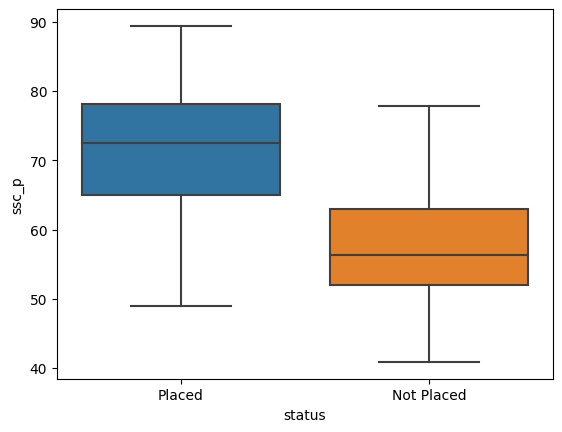

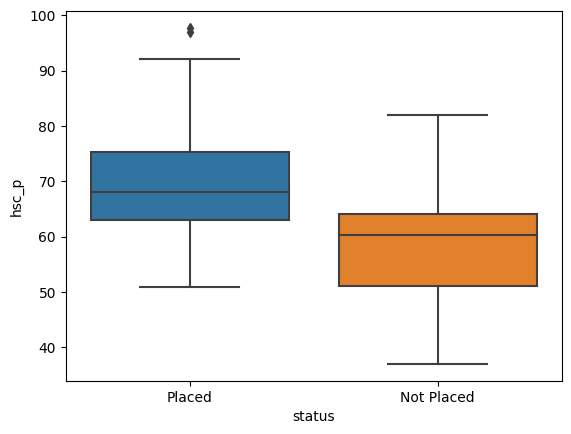

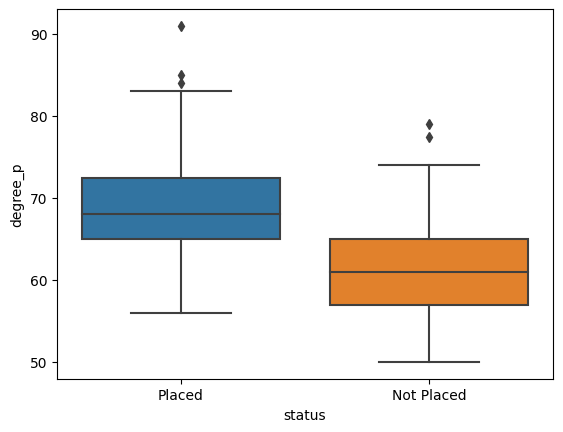

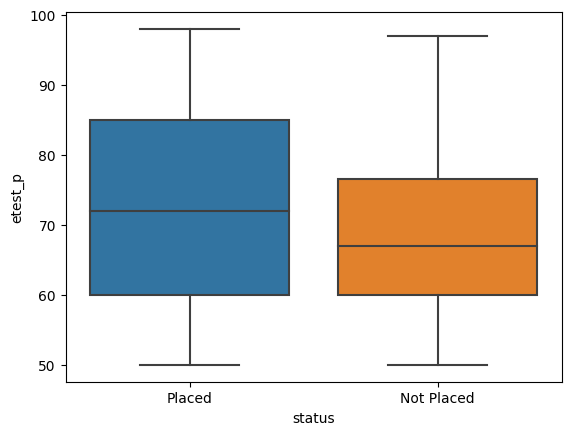

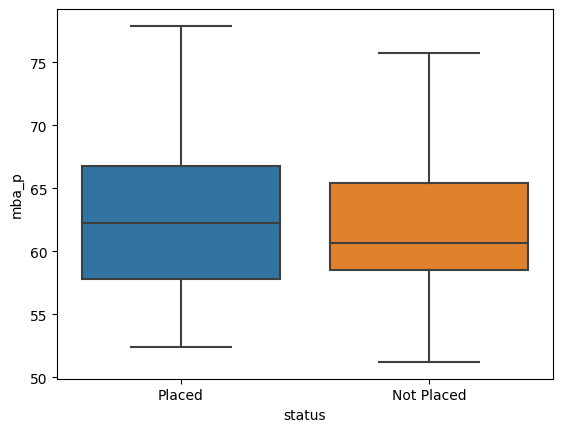

In [55]:
# Distribution of Numerical Features
# sns.kdeplot()
numerical_cols = [ 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

for col in numerical_cols:
  sns.boxplot( x=data['status'], y=data[col])
  plt.show()

In [56]:
# Correlation between numerical features

# correlations - pearson , spearman , point biserial , phi

# will do pearson

data_numerical = data[numerical_cols]
data_numerical.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000


**Question 2 : Preprocessing and Feature Engineering**

Based on data visualization candidate can perform processing and feature engineering based on their understanding. Doing below 5 parts are must:
1. Handle Missing values
2. Treat Outliers
3. Standarization (If required)
4. Encoding of catagorical Features
5. Feature Engineering based on candidates understanding

In [66]:
# missing values - remove row , col, impute mean , median , mode , ml model to predict missing values
# outlier - z , box , iqr score

# standardization -
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data2 = data.copy(deep=True)
data2[numerical_cols] = scaler.fit_transform(data[numerical_cols])
# print(scaler.fit_transform(data[numerical_cols]))
# print(scaler.mean_)
# print(data)
# print(data2)

# encoding
# one hot , ordinal
data3 = data[categorical_cols]
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data3[categorical_cols] = enc.fit_transform(data3[categorical_cols])
print(data3)


# Value Counts of Catagorical Features

categorical_cols = ['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation',  'status']
for col in categorical_cols:
  print(col)
  print(data3[col].value_counts())



     gender  hsc_s  degree_t  workex  specialisation  status
0       1.0    1.0       2.0     0.0             1.0     1.0
1       1.0    2.0       2.0     1.0             0.0     1.0
2       1.0    0.0       0.0     0.0             0.0     1.0
3       1.0    2.0       2.0     0.0             1.0     0.0
4       1.0    1.0       0.0     0.0             0.0     1.0
..      ...    ...       ...     ...             ...     ...
210     1.0    1.0       0.0     0.0             0.0     1.0
211     1.0    2.0       2.0     0.0             0.0     1.0
212     1.0    1.0       0.0     1.0             0.0     1.0
213     0.0    1.0       0.0     0.0             1.0     1.0
214     1.0    2.0       0.0     0.0             1.0     0.0

[215 rows x 6 columns]
gender
1.0    139
0.0     76
Name: gender, dtype: int64
hsc_s
1.0    113
2.0     91
0.0     11
Name: hsc_s, dtype: int64
degree_t
0.0    145
2.0     59
1.0     11
Name: degree_t, dtype: int64
workex
0.0    141
1.0     74
Name: workex, dtype: in

<ipython-input-66-26d60c1f8f2a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[categorical_cols] = enc.fit_transform(data3[categorical_cols])


In [74]:
# data2.head()

data4 = pd.concat([data2[numerical_cols],data3],axis=1)
print(data4.head())

      ssc_p     hsc_p  degree_p   etest_p     mba_p  gender  hsc_s  degree_t  \
0 -0.028087  2.268812 -1.140102 -1.291091 -0.597647     1.0    1.0       2.0   
1  1.113369  1.103448  1.513267  1.087157  0.687620     1.0    2.0       2.0   
2 -0.213238  0.153313 -0.322843  0.218908 -0.769474     1.0    0.0       0.0   
3 -1.046417 -1.318339 -1.957362 -0.460592 -0.489396     1.0    2.0       2.0   
4  1.712332  0.668391  0.943909  1.864806 -1.164676     1.0    1.0       0.0   

   workex  specialisation  status  
0     0.0             1.0     1.0  
1     1.0             0.0     1.0  
2     0.0             0.0     1.0  
3     0.0             1.0     0.0  
4     0.0             0.0     1.0  


In [70]:
data3.head()

,gender,hsc_s,degree_t,workex,specialisation,status
0,1.0,1.0,2.0,0.0,1.0,1.0
1,1.0,2.0,2.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,2.0,2.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0


**Question 3 : Model Development**



1.   Divide the dataset into train and test data in the ratio 80:20
2.   Use random_state = 1 while splitting the dataset
3.   Train a Logistic Regression model and make predictions on test data




In [80]:
# Write your code here
y = data4['status']
X = data4.drop(columns=['status'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

print(43*4)

(172, 10)
(43, 10)
(172,)
172


In [81]:
# Write your code here
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

**Question 4: Model Inference and Evaluation**

Compute model evaluation metrics from Confusion Matrix:

1.   Precision
2.   Recall
3.   Accuracy
4.   F1-score



In [84]:
# Write your code here
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

11
26


In [87]:
print("precision")
precision = (tp)/(tp+fp)
print((tp)/(tp+fp))
print("recall")
recall = (tp)/(tp+fn)
print((tp)/(tp+fn))

print("f1 score")
print((2*precision*recall)/(precision+recall))

print("accuracy")
print((tp+tn)/(tp+fp+tn+fn))

precision
0.8666666666666667
recall
0.9285714285714286
f1 score
0.896551724137931
accuracy
0.8604651162790697


**Bonus Question 1: Plot ROC curve based on previous model output**


**Bonus Question 2: Pruning Based on Feature Importance**


1.   Train a Random Forest Model with 100 estimators
2.   Identify importance features based on feature importance
3.   Perform pruning based on feature importance



In [ ]:
# Write your code here
